In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# parmest (binary_param2)
from binary_param2 import binary_params_peng
# import pressure function
from binary_fitting_functions import calc_outlet_xP
from binary_fitting_functions import plot_sens_analysis

In [2]:
# import configuration
from HFC125_bmimBF4_PR import configuration

In [3]:
#need to make excel csv for 125
data = pd.read_csv('R125_bmimBF4.csv')
# print(data)

In [4]:
# from HFC32_emimTf2N_PR import configuration
binary_params_peng('R125_bmimBF4.csv', configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp =  298.2, init_press =   799600 , init_x_c1 =   0.261, init_x_c2 = 0.739,
    init_kappa_2_1 = 0.6, init_kappa_1_2 = 0.2, eps = 0.1, scaling_fac = 1e-9, read=True)

2021-04-05 16:08:11 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:08:11 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:08:11 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:08:12 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:08:12 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:08:12 [INFO] idaes.init.fs.state_

2021-04-05 16:08:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:08:17 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:08:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:08:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:08:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:08:18 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using st

  27  3.4134830e+01 3.82e-09 5.31e-06  -1.7 1.95e+02    -  1.00e+00 1.00e+00h  1
  28  3.4134761e+01 3.14e-07 5.16e+02  -8.6 1.12e+03    -  1.00e+00 1.00e+00h  1
  29  3.4134770e+01 1.57e-11 4.24e-10  -8.6 1.59e+00    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 29

                                   (scaled)                 (unscaled)
Objective...............:   3.4134770390589232e+01    3.4134770390589232e+01
Dual infeasibility......:   4.2416559153934941e-10    4.2416559153934941e-10
Constraint violation....:   1.5712542378309990e-11    1.5712542378309990e-11
Complementarity.........:   2.5495604664235579e-09    2.5495604664235579e-09
Overall NLP error.......:   2.5495604664235579e-09    2.5495604664235579e-09


Number of objective function evaluations             = 150
Number of objective gradient evaluations             = 30
Number of equality constraint evaluations            = 150
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacob

In [5]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-04-05 16:09:31 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


In [6]:
k12= 0.11524746714128459
k21= 0.2919745027600006
R125_x,P= calc_outlet_xP(data,m,"R125", "bmimBF4", k21, k12,verbose=True)

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


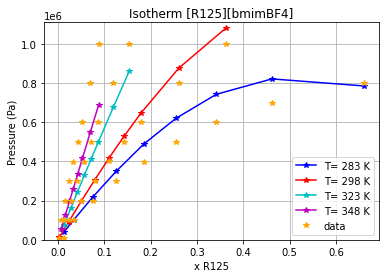

In [7]:
# plots with data - model as lines --- need to make this into a function that splits up the T's
plt.plot(R125_x[0:9],P[0:9],"b*-",label="T= 283 K")  
plt.plot(R125_x[9:18],P[9:18],"r*-",label="T= 298 K") 
plt.plot(R125_x[18:26],P[18:26],"c*-",label="T= 323 K") 
plt.plot(R125_x[26:34],P[26:34],"m*-",label="T= 348 K")
plt.plot(data["x_R125"],data["pressure"],"*",color='orange',label="data")  
plt.title('Isotherm [R125][bmimBF4]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R125')
plt.grid(True)
plt.ylim(0,1110000)
plt.legend()
plt.show()

In [8]:
# print(data)

# Sensitivity Analysis

In [9]:
# 283
data_283= data[(data.temperature > 282) & (data.temperature< 284)]
# 298
data_298 = data[(data.temperature > 297) & (data.temperature< 299)]
data_298 = data_298.reset_index(drop=True)
# 323
data_323 = data[(data.temperature > 322) & (data.temperature< 324)]
data_323 = data_323.reset_index(drop=True)
# 323
data_348 = data[(data.temperature > 347) & (data.temperature< 349)]
data_348 = data_348.reset_index(drop=True)

print(data_298)

   temperature  pressure  x_R125  x_bmimBF4
0        298.2      9800   0.003      0.997
1        298.2     99600   0.023      0.977
2        298.2    199800   0.050      0.950
3        298.1    299500   0.080      0.920
4        298.2    399800   0.111      0.889
5        298.2    499500   0.143      0.857
6        298.2    599500   0.180      0.820
7        298.2    799600   0.261      0.739
8        298.1    999800   0.363      0.637


In [10]:
binary_params_peng(data_298, configuration, 'R125', 'bmimBF4', "x_R125", "x_bmimBF4", 
    init_temp =  298.2, init_press =   799600 , init_x_c1 =   0.261, init_x_c2 = 0.739,
    init_kappa_2_1 = 0.6, init_kappa_1_2 = 0.2, eps = 0.1, scaling_fac = 1e-9, read=False)

2021-04-05 16:10:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:10:04 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:10:04 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:10:05 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-04-05 16:10:05 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-05 16:10:05 [INFO] idaes.init.fs.state_

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usual

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usual

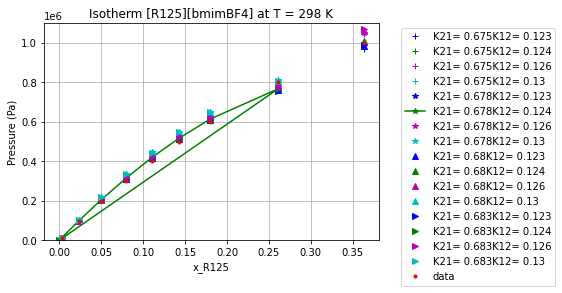

In [11]:
kappa12= np.array([0.123,0.124,0.126,0.130])
kappa21= np.array([0.675,0.678,0.680,0.683])
plot_sens_analysis(data_298,m,"R125","bmimBF4",kappa21,kappa12,"T = 298 K")


In [ ]:
# HFC= "R125"
# IL= "bmimBF4"

# x2,P2= calc_outlet_xP(data,m, "R125", "bmimBF4", kappa21[0],kappa12[1])
# plt.plot(x2,P2,"g+",label="K21= "+str(kappa21[0])+ "K12= "+ str(kappa12[1]))
# plt.plot(data["x_"+HFC],data["pressure"],"r.",label="data")  
# plt.title("Isotherm "+ "["+HFC+"]["+IL+"] at "+ T_label)
# plt.ylabel('Pressure (Pa)')
# plt.xlabel("x_"+HFC)
# plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.show()